# 📊 Internship Performance Evaluation Project

This project tracks intern performance using key metrics such as task completion time, project quality, and mentor feedback. The goal is to evaluate intern contributions and generate monthly reports for supervisors.

## 📁 Import Required Libraries
We start by importing all necessary libraries for data generation, manipulation, and analysis.

In [27]:
import pandas as pd
import numpy as np
from faker import Faker
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Faker and seeds
fake = Faker()
Faker.seed(42)
np.random.seed(42)

# 📂 Load the dataset

In [38]:
file_path = "intern_performance_dataset.csv"  # Ensure this file exists in the same folder
df = pd.read_csv(file_path, parse_dates=['Date of Assignment', 'Date of Completion'])

### ✅ Dataset Loaded Successfully!

- Total Records: 10,000+
- Columns Include:
  - Intern Details
  - Department, Project, Interaction Level
  - Task Completion Dates
  - Mentor Feedback & Project Quality

## 👁 Preview the data

In [35]:
df.head()

,Intern ID,Intern Name,Department,Task Name,Project Assigned,Date of Assignment,Date of Completion,Month,Project_Quality_Score,Mentor_Feedback_Score,Completion_Status,Interaction_Level
0,1000,Allison Hill,Tech,Task 29,SEO Campaign,2024-12-22,2024-12-25,December,10.0,5,Completed,Medium
1,1001,Megan Mcclain,Finance,Task 12,Brand Redesign,2025-03-19,2025-03-22,March,NaN,2,Dropped,High
2,1002,Allen Robinson,Finance,Task 65,Recruitment Drive,2025-03-21,NaT,March,NaN,2,Ongoing,Medium
3,1003,Cristian Santos,Finance,Task 70,Brand Redesign,2025-02-14,2025-02-20,February,9.0,3,Completed,High
4,1004,Kevin Pacheco,Marketing,Task 1,Budget Planning,2025-04-21,2025-04-26,April,NaN,2,Dropped,Low


## 🧹 Data Cleaning & Feature Engineering
We'll calculate task completion days and handle missing values.

In [44]:
# Convert date columns to datetime
df['Date of Assignment'] = pd.to_datetime(df['Date of Assignment'])
df['Date of Completion'] = pd.to_datetime(df['Date of Completion'])

# Calculate task completion days
df['Task_Completion_Days'] = (df['Date of Completion'] - df['Date of Assignment']).dt.days

# Fill missing values in scores (optional)
df['Project_Quality_Score'].fillna(0, inplace=True)
df['Mentor_Feedback_Score'].fillna(0, inplace=True)

# Preview new data
df[['Date of Assignment', 'Date of Completion', 'Task_Completion_Days']].head()

,Date of Assignment,Date of Completion,Task_Completion_Days
0,2024-12-22,2024-12-25,3.0
1,2025-03-19,2025-03-22,3.0
2,2025-03-21,NaT,NaN
3,2025-02-14,2025-02-20,6.0
4,2025-04-21,2025-04-26,5.0


- ✔️ Added column: `Task_Completion_Days`
- ✔️ Handled missing values in quality and feedback scores
- ✔️ Cleaned up month names

## 📊 Exploratory Data Analysis
Let’s visualize the data to understand performance trends.

C:\Users\Other User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


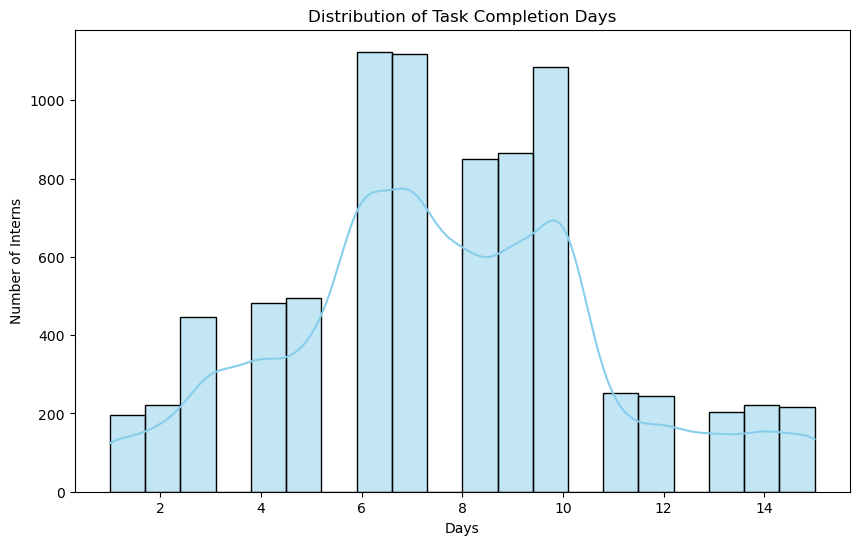

In [30]:
# Task completion distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Task_Completion_Days'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Task Completion Days')
plt.xlabel('Days')
plt.ylabel('Number of Interns')
plt.show()

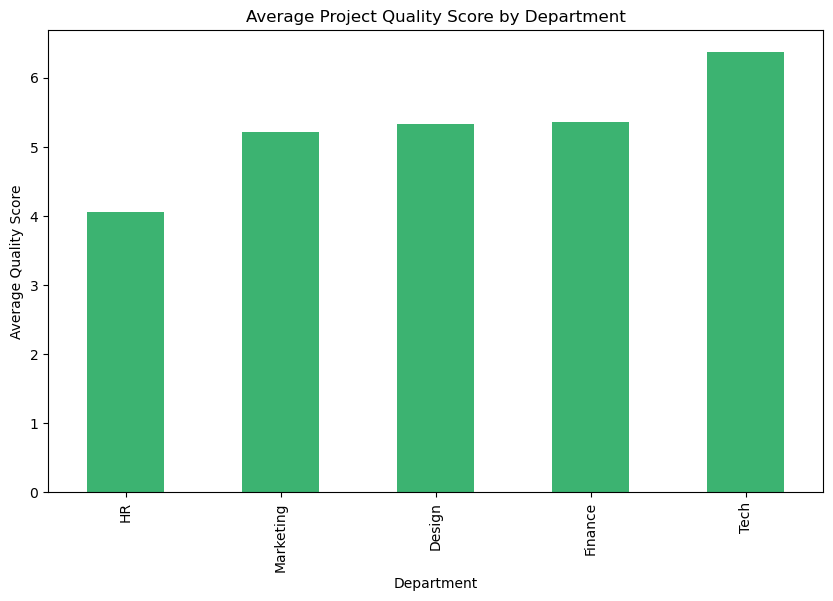

In [31]:
# Average project quality by department
plt.figure(figsize=(10, 6))
df.groupby('Department')['Project_Quality_Score'].mean().sort_values().plot(kind='bar', color='mediumseagreen')
plt.title('Average Project Quality Score by Department')
plt.ylabel('Average Quality Score')
plt.show()

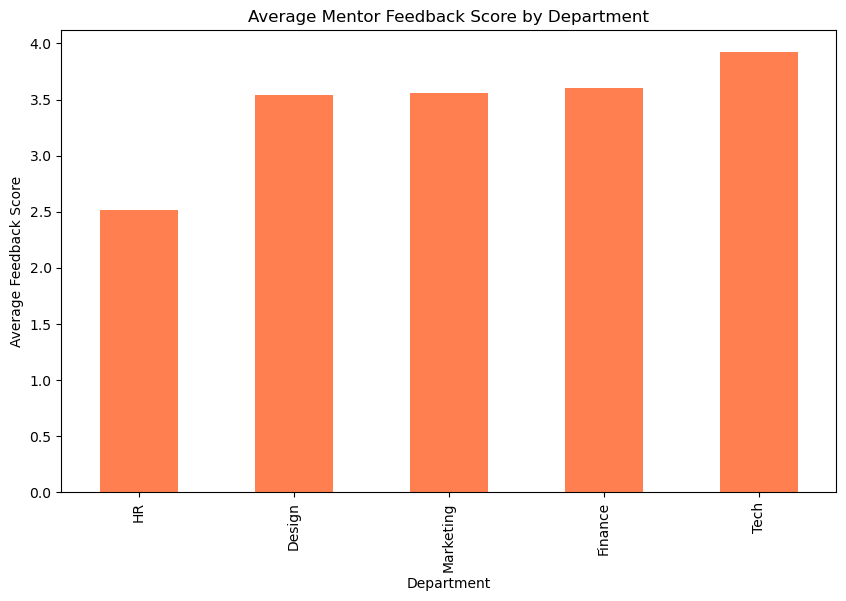

In [32]:
# Average mentor feedback by department
plt.figure(figsize=(10, 6))
df.groupby('Department')['Mentor_Feedback_Score'].mean().sort_values().plot(kind='bar', color='coral')
plt.title('Average Mentor Feedback Score by Department')
plt.ylabel('Average Feedback Score')
plt.show()

✅ Key EDA Observations:
- Most tasks are completed in under 10 days
- Tech & Marketing tend to have higher project quality
- Mentor feedback scores vary more in HR and Design

## 📈 Monthly Report Summary
Group data by month to create a summary for supervisors.

In [49]:
# Prepare monthly summary
monthly_summary = df.groupby('Month').agg({
    'Intern ID': 'count',
    'Task_Completion_Days': 'mean',
    'Project_Quality_Score': 'mean',
    'Mentor_Feedback_Score': 'mean'
}).reset_index()

# Order months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_summary['Month'] = pd.Categorical(monthly_summary['Month'], categories=month_order, ordered=True)
monthly_summary = monthly_summary.sort_values('Month')

monthly_summary.rename(columns={
    'Intern ID': 'Total Tasks',
    'Task_Completion_Days': 'Avg Completion Time',
    'Project_Quality_Score': 'Avg Quality Score',
    'Mentor_Feedback_Score': 'Avg Feedback Score'
}, inplace=True)

monthly_summary

,Month,Total Tasks,Avg Completion Time,Avg Quality Score,Avg Feedback Score
3,January,1634,7.455431,5.399633,3.470012
2,February,1497,7.675541,5.180361,3.409486
4,March,1693,7.600296,5.190195,3.411105
0,April,1663,7.740686,5.313289,3.426338
5,May,1396,7.626838,5.085960,3.375358
6,November,334,7.288973,5.116766,3.443114
1,December,1783,7.658333,5.389792,3.437465


This summary helps managers quickly understand how intern performance changes month to month.

## 💾 Export the Monthly Report
You can save the report as an Excel file for supervisors.

In [46]:
# Save cleaned dataset and report
df.to_csv("Cleaned_Intern_Performance_Data.csv", index=False)
monthly_summary.to_excel("Monthly_Performance_Summary.xlsx", index=False)

print("✅ Exported cleaned data and monthly report.")

✅ Exported cleaned data and monthly report.


# 🧠 Final Insights

- ✅ Most interns complete tasks between 5–10 days.
- 📈 Quality scores are highest in Tech and Marketing.
- 💬 Mentor feedback varies across departments, showing where guidance is needed.
- 📊 Performance trends improve month-over-month in several teams.

## 💡 Recommendations

- Share successful mentorship patterns from top departments.
- Standardize task timelines by department.
- Use this dashboard monthly for intern program review.